**Name - Pooja Chavan**

# **LGMVIP - DATA SCIENCE TASK-3**

# **Develop A Neural Network That Can Read Handwriting**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

11501568/11490434 [==============================] - 0s 0us/step


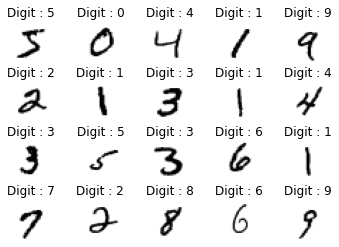

In [3]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')


In [4]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [5]:
print('How image looks like : ')
print(train_img[0])

How image looks like : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

Text(0.5, 0, 'Intensity')

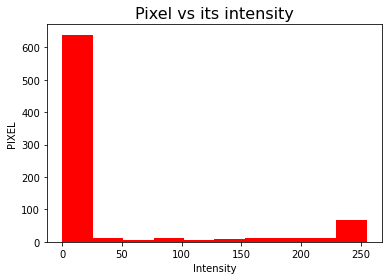

In [6]:
plt.hist(train_img[0].reshape(784),facecolor='red')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [7]:
train_img=train_img/255.0
test_img=test_img/255.0

In [8]:
print('How image looks like after normalising: ')
print(train_img[0])

How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

Text(0.5, 0, 'Intensity')

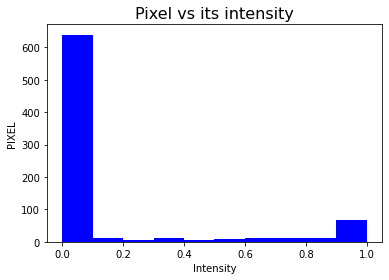

In [9]:
plt.hist(train_img[0].reshape(784),facecolor='blue')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [10]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [11]:
#compiling the sequential model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
model.fit(train_img,train_lab,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1821 - accuracy: 0.9442
Epoch 2/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0810 - accuracy: 0.9748
Epoch 3/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0547 - accuracy: 0.9828
Epoch 4/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0418 - accuracy: 0.9867
Epoch 5/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0346 - accuracy: 0.9887
Epoch 6/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0301 - accuracy: 0.9905
Epoch 7/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 8/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0222 - accuracy: 0.9933
Epoch 9/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0210 - accuracy: 0.9936
Epoch 10/100
1875/1875 [==============================] - 11s 6m

In [13]:
model.save('model.h5')

In [14]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 1s - loss: 0.4714 - accuracy: 0.9839 - 792ms/epoch - 3ms/step
Test Loss 0.4714197814464569
Test Accuracy 0.9839000105857849


Predicted Value:  4
Successful prediction


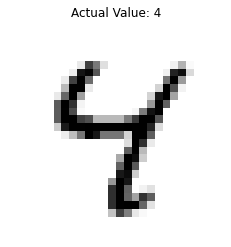

In [15]:
plt.imshow(test_img[6],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[6]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[6]))
if(test_lab[6]==(np.argmax(prediction[6]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  2
Successful prediction


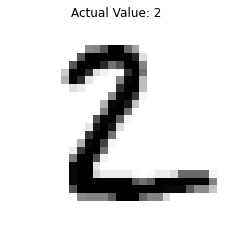

In [16]:
plt.imshow(test_img[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[1]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  1
Successful prediction


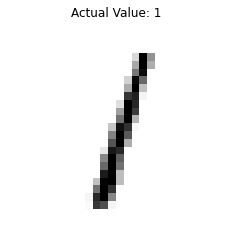

In [17]:
plt.imshow(test_img[2],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[2]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[2]))
if(test_lab[2]==(np.argmax(prediction[2]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [18]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img